<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه سوم داده کاوی</b>
<br>
<font size=5> استاد درس: دکتر فاطمه شاکری
<br>
<font size=5> طراحان پروژه: مهدی رجالی، مهدی غیاثی، سینا ارزبین
<br>
<font size=4> پاییز ۱۴۰۳
<hr>
</div>
</font>

<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=5><font color='#eb4034'>
توجه داشته باشید علاوه بر پیاده سازی خواسته شده، توضیحات لازم در محل تعریف شده را بیان کنید.
</p>
</font>
</div>
</font>

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
بارگذاری کتابخانه های مورد نیاز

In [ ]:
import numpy as np
import pandas as pd
import pickle

# Plotting and visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
# %config InlineBackend.figure_formats = ['svg']
import seaborn as sns

# Used to draw a progress bar for longer method calls
from tqdm import tqdm
tqdm.pandas()

# Pre-trained natural language processing pipeline
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

# Used to import list of punctuations
import string

# Feature extraction (text vectorizers)
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering and evaluation
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer


# Topic modeling
from gensim.models import LdaModel
from gensim.models import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Wordcloud
from wordcloud import WordCloud

# Grid search
from sklearn.model_selection import ParameterGrid


pd.set_option('display.max_rows', None)


<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
بارگذاری مجموعه داده

In [ ]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df.head(20)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [ ]:
df["category"].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
پیش پردازش

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>1. توکنایز‌کردن، حذف علائم اضافی و ریشه‌یابی</b>
</font>
</h4>
<div dir=rtl>
<font face="B Nazanin" size=4>
در این بخش باید انواع مختلفی از پیش‌پردازش ها را بر روی متون اعمال کنید:
<ol>
    <li>توکنایز کردن متون</li>
    <li>تبدیل تمام حروف به حروف کوچک</li>
    <li>حذف علائم نگارشی (Punctuations)</li>
    <li>حذف Stop word‌ها</li>
    <li>ریشه‌یابی (Lemmatization)</li>
    <li>حذف ضمایر</li>
    <li>حذف اعداد</li>
    <li>حذف کلمات کوتاه‌تر از سه حرف</li>
</ol>
متن‌های پردازش‌شده را در ستون <code>processed_content</code> ذخیره کنید.
</font>
</p>
</div>

<div dir=rtl>
<font face="B Nazanin" size=4>
تذکر: به ترتیب انجام مراحل فوق دقت کنید. ترتیب داده‌شده لزوماً صحیح نیست.
</font>
</p>


In [ ]:
#TODO - tokenize the text
!pip install nltk
import nltk
from nltk.corpus import stopwords
import re



nltk.download('stopwords')


df['content'] = df['content'].fillna('')


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


stop_words = set(stopwords.words('english'))

# pronouns to remove
pronouns = {
    'i', 'me', 'my', 'myself', 'we', 'us', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'this', 'that', 'these', 'those'
}


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    tokens = [token for token in tokens if token not in stop_words and token not in pronouns]
    tokens = [token for token in tokens if len(token) >= 3]
    processed_text = ' '.join(tokens)
    return processed_text






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

df['processed_content'] = df['content'].apply(preprocess_text)



print(df[['content', 'processed_content']].head())

                                             content  \
0   Quarterly profits at US media giant TimeWarne...   
1   The dollar has hit its highest level against ...   
2   The owners of embattled Russian oil giant Yuk...   
3   British Airways has blamed high fuel prices f...   
4   Shares in UK drinks and food firm Allied Dome...   

                                   processed_content  
0  quarterly profit media giant timewarner jump t...  
1  dollar hit high level euro almost three month ...  
2  owner embattle russian oil giant yukos ask buy...  
3  british airways blame high fuel price drop pro...  
4  share drink food firm ally domecq rise specula...  


In [ ]:
df.head(10)

,category,filename,title,content,processed_content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump t...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit high level euro almost three month ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask buy...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame high fuel price drop pro...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,share drink food firm ally domecq rise specula...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,japans economy teeter brink technical recessio...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,create job expect january fall jobseeker push ...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",india attend meeting seven lead industrialise ...
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,ethiopia produce million tonne crop high avera...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,government claim accuse country big tobacco co...


<div dir=rtl>
<font face="B Nazanin" size=4>
Stop wordهای معمول که کتابخانه‌ها ارائه می‌دهند شامل تمام کلمات غیر ضروری نمی‌باشد. در این بخش ابتدا تعداد هر کلمه موجود در داده‌های توکنایز شده را پیدا کنید، سپس از میان 100 کلمه پر تکرار، کلماتی را که فکر می‌کنید بی اهمیت می‌باشند را به لیست Stop wordها اضافه کنید
و آنها را نیز حذف کنید.
</font>
</p>
</div>

In [ ]:
#TODO - show the most common words

from collections import Counter

all_words = ' '.join(df['processed_content']).split()

word_counts = Counter(all_words)

#  top 100 most common words
common_words = word_counts.most_common(100)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])


common_words_df.head(100)

,Word,Frequency
0,say,8816
1,year,2841
2,would,2629
3,make,2191
4,also,2156
5,people,2040
6,new,1918
7,one,1794
8,take,1707
9,good,1558


In [ ]:

# you should change this one!!!!
additional_stop_words = {
    'say', 'would', 'make', 'also', 'one', 'take', 'good', 'get', 'could', 'use',
    'last', 'win', 'first', 'come', 'two', 'see', 'well', 'play', 'show', 'tell',
    'firm', 'want', 'give', 'add', 'think', 'like', 'back', 'include', 'many',
    'set', 'look', 'three', 'may', 'million', 'expect', 'help', 'right', 'call',
    'find', 'know', 'rise', 'second', 'still', 'start', 'much', 'since', 'end',
    'high', 'phone', 'award', 'offer', 'claim', 'try', 'move', 'early', 'top',
    'lead', 'become', 'put', 'share', 'change', 'record', 'hold', 'issue', 'run',
    'believe', 'increase', 'however', 'news', 'year', 'new', 'world', 'open', 'test'
}

stop_words_updated = stop_words.union(additional_stop_words)

print(f"\nTotal stop words after update: {len(stop_words_updated)}")




Total stop words after update: 253


In [ ]:


def preprocess_text_updated(text):
    try:

        text = text.lower()

        text = re.sub(r'\d+', '', text)

        text = text.translate(str.maketrans('', '', string.punctuation))

        doc = nlp(text)
        tokens = [token.lemma_ for token in doc]

        tokens = [token for token in tokens if token not in stop_words_updated and token not in pronouns]


        processed_text = ' '.join(tokens)

        return processed_text
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return ""


In [ ]:


df['processed_content'] = df['content'].apply(preprocess_text_updated)

print("\nProcessed Content After Updating Stop Words:")
print(df[['content', 'processed_content']].head())



Processed Content After Updating Stop Words:
                                             content  \
0   Quarterly profits at US media giant TimeWarne...   
1   The dollar has hit its highest level against ...   
2   The owners of embattled Russian oil giant Yuk...   
3   British Airways has blamed high fuel prices f...   
4   Shares in UK drinks and food firm Allied Dome...   

                                   processed_content  
0    quarterly profit media giant timewarner jump...  
1    dollar hit level euro almost month federal r...  
2    owner embattle russian oil giant yukos ask b...  
3    british airways blame fuel price   drop prof...  
4    uk drink food ally domecq speculation target...  


In [ ]:
df.head(10)

,category,filename,title,content,processed_content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit level euro almost month federal r...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask b...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame fuel price drop prof...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,uk drink food ally domecq speculation target...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,japans economy teeter brink technical recess...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,create job january fall jobseeker push unemp...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",india attend g meeting seven industrialise n...
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,ethiopia produce tonne crop average...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,government accuse country big tobacco compan...


<div dir=rtl>

---


<font face="B Nazanin" size=4>
از آنجایی که فرآیند بالا کمی زمان بر است، می‌توانید یک بار آن را انجام دهید و با اجرای بلاک زیر دیتافریم را ذخیره کنید.
</font>
</p>
</div>

In [ ]:
pickle.dump(df, open("processed_df.pkl", "wb"))

<div dir=rtl>
<font face="B Nazanin" size=4>
با اجرای بلاک زیر نیز می‌توانید دیتافریم ذخیره شده را بارگذاری کنید.
</font>
</p>
</div>

In [ ]:
df = pickle.load(open("processed_df.pkl", "rb"))

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>2. استخراج ویژگی از متون</b>
</font>
</h4>
<div dir=rtl>
<font face="B Nazanin" size=4>
ماتریس ویژگی متون را با استفاده از
<code>TfidfVectorizer</code>
بسازید.
</font>
</p>
</div>

In [ ]:
# TODO - tf-idf vectorization (set max_features to 8192)


tfidf_vectorizer = TfidfVectorizer(max_features=8192)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_content'])


print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (2225, 8192)


In [ ]:
df.head(10)

,category,filename,title,content,processed_content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit level euro almost month federal r...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask b...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame fuel price drop prof...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,uk drink food ally domecq speculation target...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,japans economy teeter brink technical recess...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,create job january fall jobseeker push unemp...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",india attend g meeting seven industrialise n...
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,ethiopia produce tonne crop average...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,government accuse country big tobacco compan...


<div dir=rtl>
<font face="B Nazanin" size=4>
شهود پشت استخراج ویژگی TF-IDF چیست؟ تفاوت آن با شمردن ساده‌ی تکرر کلمات در هر متن چیست؟
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>
TF-IDF یه روش  برای تبدیل کلمات به عدد هست که اهمیت هر کلمه رو هم تو یک متن و هم تو همه متون بررسی می‌کنه. برخلاف شمارش ساده که فقط می‌شماره یه کلمه چند بار اومده، TF-IDF بررسی می‌کنه اون کلمه چقدر تو چند متن دیگه هم هست. اگه یه کلمه تو خیلی متون باشه، وزنش کم می‌شه چون خیلی رایجه، ولی اگه کمتر رایج باشه، اهمیتش بیشتر می‌شه. اینجوری مدل‌های یادگیری ماشین می‌تونن کلمات مهم‌تر رو بهتر تشخیص بدن و تحلیل‌های دقیق‌تری انجام بدن. خلاصش، TF-IDF کمک می‌کنه تا بفهمیم کدوم کلمات واقعاً مهم‌تر هستن نه فقط پر تکرار.
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
خوشه بندی

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>کاهش بعد توسط PCA</b>
</font>
</h4>
<div dir=rtl>
<font face="B Nazanin" size=4>
با استفاده از
<code>PCA</code>
ابعاد ماتریس ویژگی‌ها را کاهش دهید.
</font>
</p>
</div>

In [ ]:
# TODO - PCA dimensionality reduction (set n_components to 0.95)



pca = PCA(n_components=0.95, random_state=42)

tfidf_dense = tfidf_matrix.toarray()
reduced_features = pca.fit_transform(tfidf_dense)

print(f"Before: {tfidf_matrix.shape}")
print(f"after PCA: {reduced_features.shape}")

pickle.dump(pca, open("pca_model.pkl", "wb"))



Before: (2225, 8192)
after PCA: (2225, 1538)


In [ ]:
pca_df = pd.DataFrame(reduced_features)
print(pca_df.head())


       0         1         2         3         4         5         6     \
0 -0.038172  0.153220 -0.019843  0.063638 -0.021883  0.013515  0.032693   
1  0.049384  0.179181 -0.116771  0.171780  0.089780 -0.062074 -0.033128   
2  0.004250  0.127137 -0.065957  0.099897 -0.243446  0.208495  0.270009   
3 -0.009908  0.114974 -0.076315  0.075422  0.016613  0.005122  0.000624   
4 -0.010123  0.063771 -0.048547  0.063037 -0.047775  0.039344  0.051658   

       7         8         9     ...      1528      1529      1530      1531  \
0 -0.008834  0.020938  0.024193  ... -0.015041 -0.014834  0.007116 -0.010670   
1 -0.029898  0.007787 -0.016856  ...  0.018341  0.012177 -0.040532 -0.004130   
2  0.068708 -0.074228  0.203537  ...  0.018410  0.002521 -0.010640  0.002545   
3 -0.008872  0.032348 -0.016022  ...  0.006043  0.003468  0.009805 -0.010099   
4  0.000792  0.041176  0.001418  ... -0.004289  0.002435 -0.012532  0.000168   

       1532      1533      1534      1535      1536      1537  
0  0

<div dir=rtl>
<font face="B Nazanin" size=4>
غالب الگوریتم‌های خوشه‌بندی من‌جمله الگوریتم K-Means، با داده‌های پربعد کارکرد خوبی ندارند و از این جهت کاهش بعد می‌تواند در مقابله با این مشکل به ما کمک کند.
در حد یک یا دو خط در مورد چرایی این موضوع توضیح دهید.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  

در فضای پربعد، فاصله بین نقاط کمتر متمایز می‌شود و الگوریتم‌هایی مانند K-Means نمی‌توانند خوشه‌های واضحی را شناسایی کنند. کاهش بعد با کاهش پیچیدگی داده، تفکیک بهتر و کارایی بالاتر الگوریتم‌های خوشه‌بندی را ممکن می‌سازد.
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<font face="B Nazanin" size=4>
با استفاده از الگوریتم خوشه بندی
<code>KMeans</code>
اسناد را خوشه بندی کنید.

برای تعیین بهترین تعداد خوشه‌ها، از معیار Distortion استفاده کنید و Elbow Plot را برای خوشه‌بندی‌ها با K=2 تا K=30 رسم کنید.

در صورتی که از Elbow Plot اطلاعات مفیدی قابل استخراج نبود، خوشه‌بندی‌های گفته شده را با معیار Normalized Mutual Information مقایسه کنید.
</font>
</p>
</div>

K=2, Distortion=2038.38465806764
K=3, Distortion=2020.8628161298677
K=4, Distortion=2005.3909959063294
K=5, Distortion=1993.3919140127612
K=6, Distortion=1981.3863201256886
K=7, Distortion=1971.6872654075316
K=8, Distortion=1963.3797819026277
K=9, Distortion=1954.6693819955935
K=10, Distortion=1948.127857658323
K=11, Distortion=1941.9066697881572
K=12, Distortion=1932.6763450454935
K=13, Distortion=1926.9318811120525
K=14, Distortion=1925.952319030964
K=15, Distortion=1916.8837138226481
K=16, Distortion=1911.070411885438
K=17, Distortion=1907.9806242194095
K=18, Distortion=1902.7176710539554
K=19, Distortion=1895.2951326945008
K=20, Distortion=1889.7652557296344
K=21, Distortion=1891.172792578696
K=22, Distortion=1881.3985749905526
K=23, Distortion=1880.1606201743477
K=24, Distortion=1872.6537994654802
K=25, Distortion=1869.2888640327783
K=26, Distortion=1866.5726242323105
K=27, Distortion=1863.916511223687
K=28, Distortion=1855.7561862764737
K=29, Distortion=1856.2182476544692
K=30, D

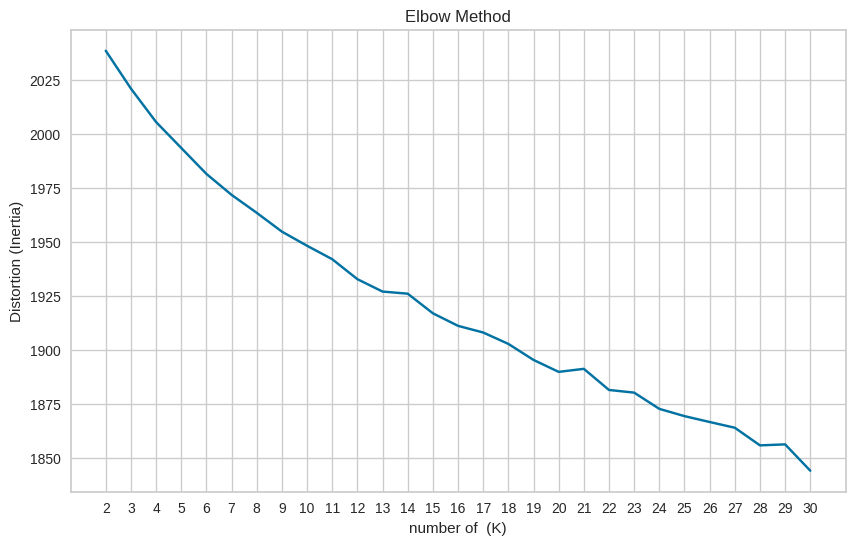

In [ ]:
# TODO - find the optimal number of clusters


distortions = []

K = range(2, 31)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_features)
    distortions.append(kmeans.inertia_)
    print(f"K={k}, Distortion={kmeans.inertia_}")

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('number of  (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method')
plt.xticks(K)
plt.grid(True)
plt.show()






K=2, NMI=0.24444316633888946
K=3, NMI=0.5406318769904858
K=4, NMI=0.5829997633732864
K=5, NMI=0.7396247926935078
K=6, NMI=0.6313745465145898
K=7, NMI=0.6317580491206441
K=8, NMI=0.6720834909219733
K=9, NMI=0.6613857892235583
K=10, NMI=0.643023490749826
K=11, NMI=0.7119283958306738
K=12, NMI=0.6297506528195239
K=13, NMI=0.6230459180816965
K=14, NMI=0.5949450175693655
K=15, NMI=0.5838602096565095
K=16, NMI=0.5638881680814167
K=17, NMI=0.6039285251094604
K=18, NMI=0.5633509224660472
K=19, NMI=0.565986686451425
K=20, NMI=0.5448296401864924
K=21, NMI=0.5621506587348785
K=22, NMI=0.5545741783266303
K=23, NMI=0.5332819711629538
K=24, NMI=0.5731103164406516
K=25, NMI=0.5583796076104658
K=26, NMI=0.5322780624491463
K=27, NMI=0.5219946605755158
K=28, NMI=0.5419622492539993
K=29, NMI=0.5460902836054277
K=30, NMI=0.5256185371159477


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1576 (\N{ARABIC LETTER BEH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1585 (\N{ARABIC LETTER REH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1740 (\N{ARABIC LETTER FARSI YEH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/py

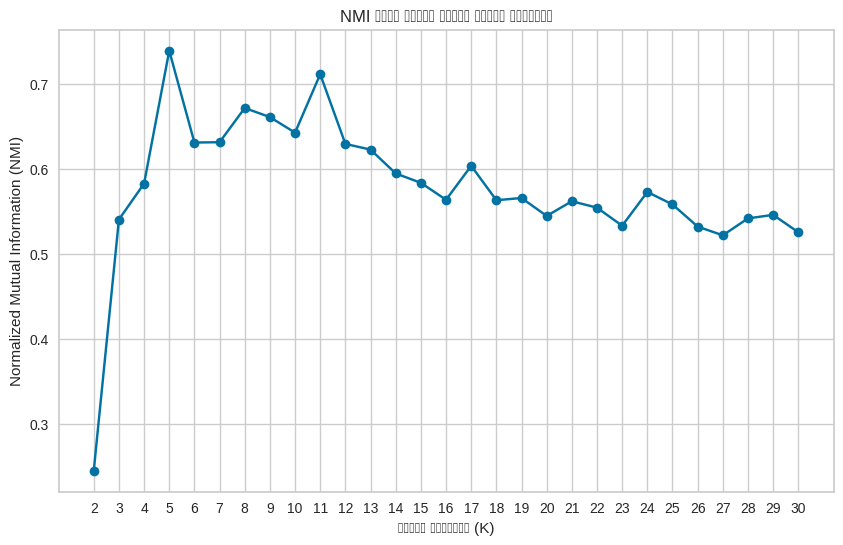

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

true_labels = df['category']


nmi_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_features)
    predicted_labels = kmeans.labels_
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    nmi_scores.append(nmi)
    print(f"K={k}, NMI={nmi}")

plt.figure(figsize=(10, 6))
plt.plot(K, nmi_scores, 'bo-')
plt.xlabel('number of k')
plt.ylabel('Normalized Mutual Information (NMI)')
plt.title('NMI')
plt.xticks(K)
plt.grid(True)
plt.show()


In [ ]:
optimal_k_nmi = K[nmi_scores.index(max(nmi_scores))]
print(f"best  NMI: {optimal_k_nmi}")

kmeans_optimal_nmi = KMeans(n_clusters=optimal_k_nmi, random_state=42, n_init=10)
kmeans_optimal_nmi.fit(reduced_features)

df['Cluster_NMI'] = kmeans_optimal_nmi.labels_

pickle.dump(kmeans_optimal_nmi, open("kmeans_model_nmi.pkl", "wb"))

print(df[['content', 'processed_content', 'Cluster_NMI']].head(100))


best  NMI: 5
                                              content  \
0    Quarterly profits at US media giant TimeWarne...   
1    The dollar has hit its highest level against ...   
2    The owners of embattled Russian oil giant Yuk...   
3    British Airways has blamed high fuel prices f...   
4    Shares in UK drinks and food firm Allied Dome...   
5    Japan's economy teetered on the brink of a te...   
6    The US created fewer jobs than expected in Ja...   
7    India, which attends the G7 meeting of seven ...   
8    Ethiopia produced 14.27 million tonnes of cro...   
9    A US government claim accusing the country's ...   
10   Ask Jeeves has become the third leading onlin...   
11   Indonesia's government has confirmed it is co...   
12   Struggling Japanese car maker Mitsubishi Moto...   
13   The Daily and Sunday Telegraph newspapers are...   
14   Air passengers who are unable to board their ...   
15   China's efforts to stop the economy from over...   
16   Parmalat, the

<div dir=rtl>
<font face="B Nazanin" size=4>
پس از انتخاب بهترین تعداد خوشه‌ها، مدل خوشه بندی را با این تعداد آموزش دهید. سپس یک ستون به نام <code>cluster</code> به دیتافریم اضافه کنید که نشان دهنده خوشه‌هایی است که مدل برای هر نمونه پیش بینی کرده است.

</font>
</p>
</div>

In [ ]:
# TODO - KMeans clustering


optimal_k = 5

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(reduced_features)

df['Cluster'] = kmeans_optimal.labels_


print(df[['content', 'processed_content', 'Cluster']].head(25))


                                              content  \
0    Quarterly profits at US media giant TimeWarne...   
1    The dollar has hit its highest level against ...   
2    The owners of embattled Russian oil giant Yuk...   
3    British Airways has blamed high fuel prices f...   
4    Shares in UK drinks and food firm Allied Dome...   
5    Japan's economy teetered on the brink of a te...   
6    The US created fewer jobs than expected in Ja...   
7    India, which attends the G7 meeting of seven ...   
8    Ethiopia produced 14.27 million tonnes of cro...   
9    A US government claim accusing the country's ...   
10   Ask Jeeves has become the third leading onlin...   
11   Indonesia's government has confirmed it is co...   
12   Struggling Japanese car maker Mitsubishi Moto...   
13   The Daily and Sunday Telegraph newspapers are...   
14   Air passengers who are unable to board their ...   
15   China's efforts to stop the economy from over...   
16   Parmalat, the Italian food

In [ ]:
pickle.dump(df, open("clustered_df.pkl", "wb"))

In [ ]:
df = pickle.load(open("clustered_df.pkl", "rb"))

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>نمایش خوشه بندی</b>
</font>
</h4>
<div dir=rtl>
<font face="B Nazanin" size=4>
با استفاده از الگوریتم
<code>t-SNE</code>
ابعاد ماتریس ویژگی‌ها را به 2 بعد کاهش دهید و نمودار خوشه بندی را رسم کنید.
</font>
</p>
</div>

In [ ]:
# TODO - TSNE dimensionality reduction

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(reduced_features)

df['TSNE-1'] = tsne_results[:,0]
df['TSNE-2'] = tsne_results[:,1]


print(df[['content', 'processed_content', 'Cluster', 'TSNE-1', 'TSNE-2']].head(100))



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


                                              content  \
0    Quarterly profits at US media giant TimeWarne...   
1    The dollar has hit its highest level against ...   
2    The owners of embattled Russian oil giant Yuk...   
3    British Airways has blamed high fuel prices f...   
4    Shares in UK drinks and food firm Allied Dome...   
5    Japan's economy teetered on the brink of a te...   
6    The US created fewer jobs than expected in Ja...   
7    India, which attends the G7 meeting of seven ...   
8    Ethiopia produced 14.27 million tonnes of cro...   
9    A US government claim accusing the country's ...   
10   Ask Jeeves has become the third leading onlin...   
11   Indonesia's government has confirmed it is co...   
12   Struggling Japanese car maker Mitsubishi Moto...   
13   The Daily and Sunday Telegraph newspapers are...   
14   Air passengers who are unable to board their ...   
15   China's efforts to stop the economy from over...   
16   Parmalat, the Italian food

In [ ]:
df.head()

,category,filename,title,content,processed_content,Cluster_NMI,Cluster,TSNE-1,TSNE-2
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump...,4,4,-15.889889,51.609585
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit level euro almost month federal r...,4,4,-5.470311,42.968636
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask b...,4,4,-23.085241,37.641891
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame fuel price drop prof...,4,4,-12.348977,27.942770
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,uk drink food ally domecq speculation target...,4,4,-12.368557,49.882889


In [ ]:
# TODO - visualize the clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE-1', y='TSNE-2',
    hue='Cluster',
    palette=sns.color_palette("hsv", df['Cluster'].nunique()),
    data=df,
    legend='full',
    alpha=0.7
)

plt.title('نمایش خوشه‌بندی اسناد با استفاده از t-SNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='خوشه‌ها')
plt.show()


<div dir=rtl>
<font face="B Nazanin" size=4>
در ۴ خط یا کمتر به طور شهودی نحوه‌ی کارکرد الگوریتم t-SNE را توضیح دهید. نیازی به اشاره به علائم و روابط ریاضی نمی‌باشد.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>

الگوریتم t-SNE داده‌های با ابعاد بالا را به یک فضای دو یا سه‌بعدی کاهش می‌دهد تا بتوان آن‌ها را بصری مشاهده کرد. این کار با حفظ روابط مشابهت میان نقاط داده انجام می‌شود؛ یعنی نقاط مشابه در فضای اصلی، در فضای جدید نیز به هم نزدیک خواهند بود. به طور شهودی، t-SNE تلاش می‌کند که ساختارهای پیچیده داده‌ها را در یک نقشه ساده‌تر و قابل فهم‌تر نمایش دهد. نتیجه این کار، نمایش داده‌ها در یک فضای بصری است که گروه‌ها یا خوشه‌های مشابه به‌خوبی از هم جدا شده‌اند.
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
Topic Modeling

<div dir=rtl>
<font face="B Nazanin" size=4>
در مورد دو الگوریتم استخراج موضوع
<code>Latent Dirichlet Allocation</code> و
<code>Non-Negative Matrix Factorization</code>
مطالعه کرده و به طور خلاصه (بدون نیاز به اشاره به جزئیات ریاضی) نحوه‌ی کارکرد هر یک را توضیح دهید؛
سپس، یکی از این دو الگوریتم را برای ادامهٔ کار انتخاب کنید.
</font>
</p>
</div>

<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  

1. Latent Dirichlet Allocation (LDA)
LDA یک الگوریتم مدل‌سازی موضوعی است که هدفش شناسایی موضوعات پنهان در یک مجموعه متنی است. فرض می‌کند که هر سند ترکیبی از چندین موضوع است و هر موضوع نیز مجموعه‌ای از کلمات غالب خود را دارد. LDA از روش‌های آماری استفاده می‌کند تا برای هر سند موضوعات مختلف را شبیه‌سازی کند و به هر کلمه در سند یک احتمال تعلق به موضوعات مختلف را اختصاص دهد. به طور خلاصه، این الگوریتم تلاش می‌کند که هر سند را به مجموعه‌ای از موضوعات توزیع کند و در عین حال موضوعات را از کلمات موجود در همه اسناد استخراج کند.

2. Non-Negative Matrix Factorization (NMF)
NMF یک روش فاکتورگیری ماتریسی است که به تحلیل و استخراج ویژگی‌ها از داده‌های متنی کمک می‌کند. در NMF، یک ماتریس (مثلاً ماتریس واژه‌ها و اسناد) به دو ماتریس کوچکتر تقسیم می‌شود که در آن‌ها هیچ مقدار منفی وجود ندارد. این تقسیم‌بندی به گونه‌ای است که یک ماتریس بازسازی‌شده تقریباً مشابه ماتریس اصلی خواهد بود. در این فرایند، یکی از ماتریس‌ها معمولاً نمایانگر موضوعات و دیگری نمایانگر میزان حضور هر کلمه در هر موضوع است. بنابراین، NMF با استخراج ترکیب‌هایی از کلمات که به یک موضوع خاص تعلق دارند، به شناسایی موضوعات پنهان در داده‌های متنی کمک می‌کند.

</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<font face="B Nazanin" size=4>
تاپیک مدلینگ را بر روی داده‌های هر خوشه به طور جداگانه باید انجام دهید.
دقت کنید که در استفاده از کتابخانه‌ی <code>gensim</code>، ابتدا باید دیکشنری و BoW (Bag of Words) را برای هر خوشه بسازید.
</font>
</p>
</div>

In [ ]:
# TODO - make Dictionary and Corpus for each cluster

clusters = df['Cluster'].unique()
lda_models = {}
cluster_topics = {}

for cluster in clusters:
    print(f"Processing Cluster {cluster}")

    cluster_data = df[df['Cluster'] == cluster]['processed_content']

    cluster_data = cluster_data.apply(lambda x: x.split())
    dictionary = Dictionary(cluster_data)
    corpus = [dictionary.doc2bow(text) for text in cluster_data]

    num_topics = 5

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, alpha='auto')
    lda_models[cluster] = lda_model

    topics = lda_model.print_topics(num_words=5)
    cluster_topics[cluster] = topics

    print(f"Cluster {cluster} Topics:")
    for topic in topics:
        print(topic)
    print("\n")



Processing Cluster 4
Cluster 4 Topics:
(0, '0.010*"bank" + 0.010*"growth" + 0.010*"rate" + 0.010*"economy" + 0.008*"market"')
(1, '0.009*"£" + 0.006*"price" + 0.006*"I" + 0.006*"bn" + 0.005*"wage"')
(2, '0.012*"company" + 0.008*"bn" + 0.008*"mr" + 0.008*"£" + 0.006*"sale"')
(3, '0.011*"bn" + 0.009*"company" + 0.007*"yukos" + 0.007*"sale" + 0.007*"government"')
(4, '0.014*"mr" + 0.007*"bn" + 0.006*"government" + 0.006*"company" + 0.005*"market"')


Processing Cluster 3
Cluster 3 Topics:
(0, '0.009*"I" + 0.007*"film" + 0.005*"mr" + 0.004*"people" + 0.004*"go"')
(1, '0.013*"film" + 0.011*"£" + 0.007*"mr" + 0.007*"star" + 0.004*"glazer"')
(2, '0.008*"number" + 0.008*"chart" + 0.006*"music" + 0.006*"single" + 0.006*"album"')
(3, '0.021*"I" + 0.016*"film" + 0.009*"music" + 0.005*"star" + 0.005*"go"')
(4, '0.010*"mr" + 0.008*"government" + 0.007*"lord" + 0.006*"I" + 0.005*"people"')


Processing Cluster 0
Cluster 0 Topics:
(0, '0.015*"mobile" + 0.014*"people" + 0.011*"service" + 0.007*"user" 

<div dir=rtl>
<font face="B Nazanin" size=4>
در ادامه باید با بررسی Topic Coherence تحت معیار
<code>C_V</code>،
بهترین تعداد تاپیک‌ها را برای هر خوشه پیدا کنید.
برای هر خوشه مدلی که بیشترین مقدار معیار
را داشت نگه دارید.
<br>
بررسی تعداد تاپیک‌های 5، 10، 15، 20 و 25 کافی می‌باشد.
</font>
</p>
</div>

In [ ]:
# TODO - find the optimal number of topics for each cluster

topic_counts = [5, 10, 15, 20, 25]

best_lda_models = {}
best_coherence_scores = {}

clusters = df['Cluster'].unique()

for cluster in clusters:
    print(f"Processing Cluster {cluster}...")

    cluster_data = df[df['Cluster'] == cluster]['processed_content']
    cluster_data = cluster_data.apply(lambda x: x.split())

    dictionary = Dictionary(cluster_data)
    corpus = [dictionary.doc2bow(text) for text in cluster_data]

    best_coherence = -1
    best_model = None

    for num_topics in topic_counts:
        print(f"  Testing {num_topics} topics...")

        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             random_state=42, passes=10, alpha='auto')

        coherence_model = CoherenceModel(model=lda_model, texts=cluster_data, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        print(f"    Coherence Score for {num_topics} topics: {coherence_score}")

        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = lda_model

    best_lda_models[cluster] = best_model
    best_coherence_scores[cluster] = best_coherence

    print(f"Best model for Cluster {cluster}: {best_model.num_topics} topics with Coherence Score {best_coherence}\n")


Processing Cluster 4...
  Testing 5 topics...
    Coherence Score for 5 topics: 0.330963081219301
  Testing 10 topics...
    Coherence Score for 10 topics: 0.34980394914692814
  Testing 15 topics...
    Coherence Score for 15 topics: 0.3692192362620846
  Testing 20 topics...
    Coherence Score for 20 topics: 0.35540662760395325
  Testing 25 topics...
    Coherence Score for 25 topics: 0.36285967694327015
Best model for Cluster 4: 15 topics with Coherence Score 0.3692192362620846

Processing Cluster 3...
  Testing 5 topics...
    Coherence Score for 5 topics: 0.3642211535691881
  Testing 10 topics...
    Coherence Score for 10 topics: 0.39137694354063146
  Testing 15 topics...
    Coherence Score for 15 topics: 0.44222494094148757
  Testing 20 topics...
    Coherence Score for 20 topics: 0.3817244855618923
  Testing 25 topics...
    Coherence Score for 25 topics: 0.3878319930196154
Best model for Cluster 3: 15 topics with Coherence Score 0.44222494094148757

Processing Cluster 0...
  T

In [ ]:

print("Best Coherence Scores by Cluster:")
for cluster, score in best_coherence_scores.items():
    print(f"  Cluster {cluster}: {score}")


Best Coherence Scores by Cluster:
  Cluster 4: 0.3692192362620846
  Cluster 3: 0.44222494094148757
  Cluster 0: 0.352417580653541
  Cluster 1: 0.39722055417593016
  Cluster 2: 0.4420994564514417


In [ ]:
df.head(30)

,category,filename,title,content,processed_content,Cluster_NMI,Cluster,TSNE-1,TSNE-2
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump...,4,4,-15.889889,51.609585
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit level euro almost month federal r...,4,4,-5.470311,42.968636
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask b...,4,4,-23.085241,37.641891
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame fuel price drop prof...,4,4,-12.348977,27.942770
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,uk drink food ally domecq speculation target...,4,4,-12.368557,49.882889
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,japans economy teeter brink technical recess...,4,4,-0.040458,49.155910
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,create job january fall jobseeker push unemp...,4,4,5.822692,52.894199
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",india attend g meeting seven industrialise n...,4,4,-3.128659,34.457695
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,ethiopia produce tonne crop average...,4,4,-26.087967,28.830776
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,government accuse country big tobacco compan...,4,4,-25.520937,22.421417


<div dir=rtl>
<font face="B Nazanin" size=4>
به طور مختصر نحوه‌ی محاسبه‌ی معیار <code>C_V</code> را توضیح دهید.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  

معیار C_V یک معیار ارزیابی برای مدل‌های استخراج موضوع است که کیفیت تفکیک موضوعات را اندازه‌گیری می‌کند. این معیار بر اساس تفکیک معنایی و هم‌پوشانی کلمات در موضوعات مختلف محاسبه می‌شود.

نحوه محاسبه:
محاسبه همبستگی‌ها: برای هر جفت کلمه در دو موضوع مختلف، همبستگی مشابهت آن‌ها (مانند هم‌تکرار یا هم‌پوشانی معنایی) محاسبه می‌شود.
تفکیک معنایی: میانگین همبستگی‌ها بین کلمات مشابه در موضوعات مختلف به‌طوری‌که موضوعات مختلف به خوبی از هم تفکیک شده باشند.
C_V به‌طور کلی مقدار 0 را برای هم‌پوشانی زیاد و مقدار 1 را برای تفکیک کامل بین موضوعات نشان می‌دهد.
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>استخراج کلمات کلیدی تاپیک‌ها</b>
</font>
</h4>
<div dir=rtl>
<font face="B Nazanin" size=4>
در ادامه باید برای هر داده از دیتافریم، 3 تاپیک برتر را که مدل برای آن‌ها پیش بینی کرده است، استخراج کنید. سپس از هر تاپیک 2 کلمه کلیدی با اهمیت را استخرج کنید.
</font>
</p>
</div>

In [ ]:
top_keywords_list = []

for index, row in df.iterrows():
    text = row['processed_content'].split()
    cluster = row['Cluster']

    lda_model = best_lda_models[cluster]
    dictionary = lda_model.id2word

    bow = dictionary.doc2bow(text)

    topic_probs = lda_model.get_document_topics(bow, minimum_probability=0.0)

    sorted_topics = sorted(topic_probs, key=lambda x: x[1], reverse=True)

    top_topic_id = sorted_topics[0][0]

    topic_terms = lda_model.get_topic_terms(top_topic_id, topn=2)  # فقط 2 کلمه مهم
    top_keywords = [dictionary[word_id] for word_id, weight in topic_terms]

    top_keywords_list.append(top_keywords)

final_df = df.copy()
final_df['top_keywords'] = top_keywords_list

print(final_df[['content', 'top_keywords']].head(25))


                                              content           top_keywords
0    Quarterly profits at US media giant TimeWarne...            [bn, yukos]
1    The dollar has hit its highest level against ...      [dollar, deficit]
2    The owners of embattled Russian oil giant Yuk...            [bn, yukos]
3    British Airways has blamed high fuel prices f...            [£, profit]
4    Shares in UK drinks and food firm Allied Dome...         [bank, market]
5    Japan's economy teetered on the brink of a te...         [rate, growth]
6    The US created fewer jobs than expected in Ja...      [dollar, deficit]
7    India, which attends the G7 meeting of seven ...         [bank, market]
8    Ethiopia produced 14.27 million tonnes of cro...       [mr, government]
9    A US government claim accusing the country's ...           [company, £]
10   Ask Jeeves has become the third leading onlin...            [£, profit]
11   Indonesia's government has confirmed it is co...         [rate, growth]

In [ ]:
print(final_df[['top_keywords'][:2]].head(25))



             top_keywords
0             [bn, yukos]
1       [dollar, deficit]
2             [bn, yukos]
3             [£, profit]
4          [bank, market]
5          [rate, growth]
6       [dollar, deficit]
7          [bank, market]
8        [mr, government]
9            [company, £]
10            [£, profit]
11         [rate, growth]
12          [price, sale]
13         [bank, market]
14       [mr, government]
15         [rate, growth]
16            [bn, yukos]
17     [market, economic]
18         [rate, growth]
19            [bn, yukos]
20              [I, film]
21  [government, company]
22         [rate, growth]
23      [dollar, deficit]
24            [bn, yukos]


In [ ]:
final_df.head(10)

,category,filename,title,content,processed_content,Cluster_NMI,Cluster,TSNE-1,TSNE-2,top_keywords
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump...,4,4,-15.889889,51.609585,"[bn, yukos]"
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit level euro almost month federal r...,4,4,-5.470311,42.968636,"[dollar, deficit]"
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask b...,4,4,-23.085241,37.641891,"[bn, yukos]"
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame fuel price drop prof...,4,4,-12.348977,27.942770,"[£, profit]"
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,uk drink food ally domecq speculation target...,4,4,-12.368557,49.882889,"[bank, market]"
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,japans economy teeter brink technical recess...,4,4,-0.040458,49.155910,"[rate, growth]"
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,create job january fall jobseeker push unemp...,4,4,5.822692,52.894199,"[dollar, deficit]"
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",india attend g meeting seven industrialise n...,4,4,-3.128659,34.457695,"[bank, market]"
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,ethiopia produce tonne crop average...,4,4,-26.087967,28.830776,"[mr, government]"
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,government accuse country big tobacco compan...,4,4,-25.520937,22.421417,"[company, £]"


In [ ]:
# final_df['top_keywords'] = top_keywords_list

In [ ]:
pickle.dump(final_df, open("final_df.pkl", "wb"))

In [ ]:
final_df = pickle.load(open("final_df.pkl", "rb"))

In [ ]:
final_df.rename(columns={
    'TSNE-1': 'x',
    'TSNE-2': 'y',
    'Cluster': 'cluster'
}, inplace=True)

print(final_df.columns)


Index(['category', 'filename', 'title', 'content', 'processed_content',
       'Cluster_NMI', 'cluster', 'x', 'y', 'top_keywords'],
      dtype='object')


In [ ]:
from typing_extensions import final
final_df.head(20)

,category,filename,title,content,processed_content,Cluster_NMI,cluster,x,y,top_keywords
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump...,4,4,-15.889889,51.609585,"[bn, yukos]"
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit level euro almost month federal r...,4,4,-5.470311,42.968636,"[dollar, deficit]"
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask b...,4,4,-23.085241,37.641891,"[bn, yukos]"
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame fuel price drop prof...,4,4,-12.348977,27.942770,"[£, profit]"
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,uk drink food ally domecq speculation target...,4,4,-12.368557,49.882889,"[bank, market]"
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,japans economy teeter brink technical recess...,4,4,-0.040458,49.155910,"[rate, growth]"
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,create job january fall jobseeker push unemp...,4,4,5.822692,52.894199,"[dollar, deficit]"
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",india attend g meeting seven industrialise n...,4,4,-3.128659,34.457695,"[bank, market]"
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,ethiopia produce tonne crop average...,4,4,-26.087967,28.830776,"[mr, government]"
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,government accuse country big tobacco compan...,4,4,-25.520937,22.421417,"[company, £]"


In [ ]:
final_df['top_keywords'] = final_df['top_keywords'].apply(lambda keywords: '|'.join(map(str, keywords)) if isinstance(keywords, list) else str(keywords))

print(final_df[['top_keywords']].head(10))


     top_keywords
0        bn|yukos
1  dollar|deficit
2        bn|yukos
3        £|profit
4     bank|market
5     rate|growth
6  dollar|deficit
7     bank|market
8   mr|government
9       company|£


In [ ]:
final_df.head(10)

,category,filename,title,content,processed_content,Cluster_NMI,cluster,x,y,top_keywords
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly profit media giant timewarner jump...,4,4,-15.889889,51.609585,bn|yukos
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,dollar hit level euro almost month federal r...,4,4,-5.470311,42.968636,dollar|deficit
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,owner embattle russian oil giant yukos ask b...,4,4,-23.085241,37.641891,bn|yukos
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,british airways blame fuel price drop prof...,4,4,-12.348977,27.942770,£|profit
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,uk drink food ally domecq speculation target...,4,4,-12.368557,49.882889,bank|market
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,japans economy teeter brink technical recess...,4,4,-0.040458,49.155910,rate|growth
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,create job january fall jobseeker push unemp...,4,4,5.822692,52.894199,dollar|deficit
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",india attend g meeting seven industrialise n...,4,4,-3.128659,34.457695,bank|market
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,ethiopia produce tonne crop average...,4,4,-26.087967,28.830776,mr|government
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,government accuse country big tobacco compan...,4,4,-25.520937,22.421417,company|£


<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
نمایش خوشه بندی‌ها و تاپیک‌ها

<div dir=rtl>
<font face="B Nazanin" size=4>
با استفاده از کدی که در ادامه آمده است، می‌توانید نمودار‌های مربوط به خوشه بندی و تاپیک‌ها را مشاهده کنید.
<br>
<font color='#eb4034'>
ساختار دیتا فریمی که به کد زیر داده ‌می‌شود دقیقا باید به صورت زیر باشد:
</font>
</font>
</p>
</div>

<center>
<table style="direction: rtl;align: center; text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
  <tr>
      <td><code>x</code></td><td>ستون x ماتریس ویژگی‌ها که با TSNE به 2 بعد کاهش یافته است</td>
  </tr>
<tr>
      <td><code>y</code></td><td>ستون y ماتریس ویژگی‌ها که با TSNE به 2 بعد کاهش یافته است</td>
  </tr>
<tr>
      <td><code>cluster</code></td><td>خوشه پیش‌بینی شده برای داده‌ها</td>
  </tr>
<tr>
      <td><code>top_keywords</code></td><td>کلمات کلیدی استخراج شده برای داده‌ها*</td>

</table>
</center>

<div dir=rtl>
<font face="B Nazanin" size=4>
<br>
*توجه داشته باشد که مقادیر این ستون باید به صورت
<code>string</code>
باشند و صرفا با علامت
<code>|</code>
از هم جدا شده باشند.
به طور مثال:
<code>word1|word2|word3</code>

  

In [ ]:
!pip install dash

import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df_dash = final_df.copy()

# Split the keywords for processing
df_dash['keywords_list'] = df_dash['top_keywords'].str.split('|')

# Initialize Dash app
app = dash.Dash(__name__)

# Create the layout
app.layout = html.Div([
    html.Div([
        html.H4(" t-SNE Plot with Keyword Search"),
        dcc.Graph(id='scatter-plot'),
        html.Label("Search for a keyword:"),
        dcc.Input(id='keyword-search', type='text', placeholder='Enter keyword', debounce=True),
    ], style={'width': '75%', 'display': 'inline-block', 'backgroundColor': '#ffffff'}),

    html.Div([
        html.H4(" Most Frequent Keywords"),
        html.Div(id='keyword-panel', style={'backgroundColor': '#f0f0f5', 'padding': '10px', 'borderRadius': '5px'})
    ], style={'width': '25%', 'display': 'inline-block', 'verticalAlign': 'top', 'backgroundColor': '#f0f0f5'})
])

# Callback for updating the scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('keyword-search', 'value')]
)
def update_scatter(search_keyword):
    # Create a highlight column based on the search keyword
    if search_keyword:
        df_dash['highlight'] = df_dash['keywords_list'].apply(lambda x: any(search_keyword.lower() in k.lower() for k in x))
    else:
        df_dash['highlight'] = True  # Highlight all points if no keyword is searched

    # Prepare data for plotting
    highlighted_df = df_dash[df_dash['highlight']]
    non_highlighted_df = df_dash[~df_dash['highlight']]

    # Create scatter plot with highlighted and non-highlighted points
    fig = go.Figure()

    # Add non-highlighted points (gray color)
    fig.add_trace(go.Scatter(
        x=non_highlighted_df['x'],
        y=non_highlighted_df['y'],
        mode='markers',
        marker=dict(color='gray', size=8, opacity=0.4),
        name='Non-Highlighted',
        text=non_highlighted_df['top_keywords'],  # Add top_keywords to hover
        hoverinfo='text'  # Show only the top_keywords on hover
    ))

    # Add highlighted points with cluster colors
    for cluster in df_dash['cluster'].unique():
        cluster_df = highlighted_df[highlighted_df['cluster'] == cluster]
        fig.add_trace(go.Scatter(
            x=cluster_df['x'],
            y=cluster_df['y'],
            mode='markers',
            marker=dict(size=8, opacity=0.8),
            name=f'Cluster {cluster}',
            marker_color=px.colors.qualitative.Light24[cluster],
            text=cluster_df['top_keywords'],  # Add top_keywords to hover
            hoverinfo='text'  # Show only the top_keywords on hover
        ))

    # Update layout
    fig.update_layout(
        title="t-SNE Plot",
        xaxis_title="X",
        yaxis_title="Y",
        legend_title="Legend",
        height=800,
        width=1000
    )

    return fig

# Callback for updating the keyword panel
@app.callback(
    Output('keyword-panel', 'children'),
    [Input('scatter-plot', 'figure')]
)
def update_keyword_panel(_):
    # Flatten the list of keywords and compute most frequent ones
    all_keywords = [keyword for keywords in df_dash['keywords_list'] for keyword in keywords]
    keyword_counts = pd.Series(all_keywords).value_counts().head(40)
    return [html.Li(f"{kw}: {count}") for kw, count in keyword_counts.items()]


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, jupyter_height=1200, port=8050)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


<IPython.core.display.Javascript object>

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
Word Clouds

<div dir=rtl>
<font face="B Nazanin" size=4>
در این بخش باید Word Cloudهای مربوط به کلمات کلیدی هر خوشه را رسم کنید.

ابتدا نیاز است تعداد تکرار کلمات کلیدی هر خوشه را پیدا کنید.
(از هر تاپیک فقط 10 کلمه کلیدی برتر را در نظر بگیرید)
سپس با استفاده از کلمات کلیدی و میزان تکرار آن‌ها، Word Cloudها را رسم کنید.
</font>
</p>
</div>


Generating Word Cloud for Cluster 4...


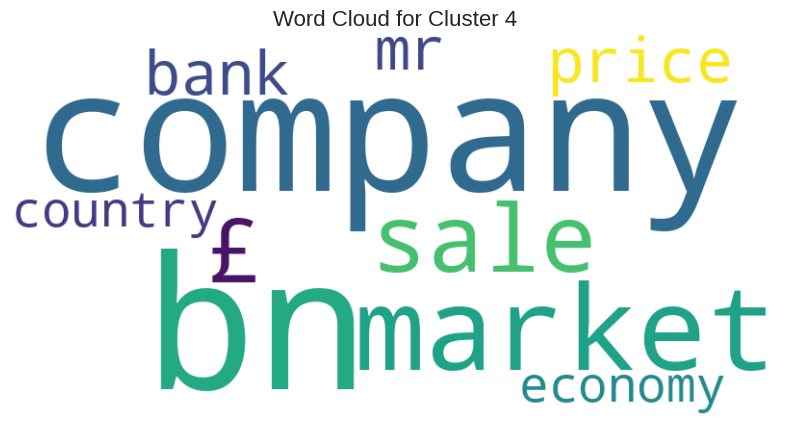

Generating Word Cloud for Cluster 3...


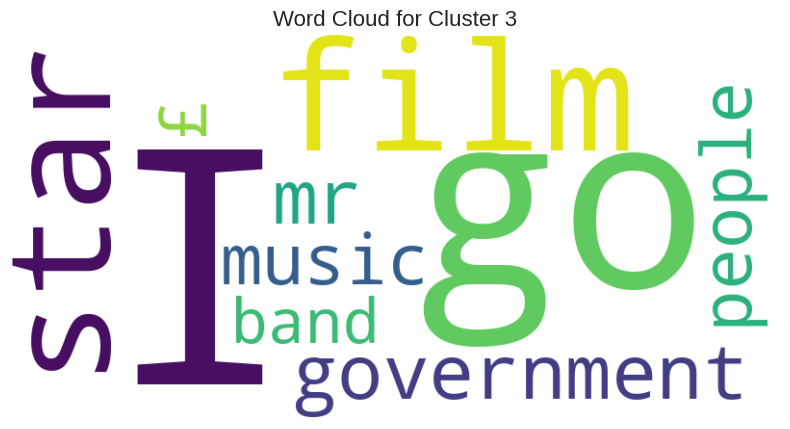

Generating Word Cloud for Cluster 0...


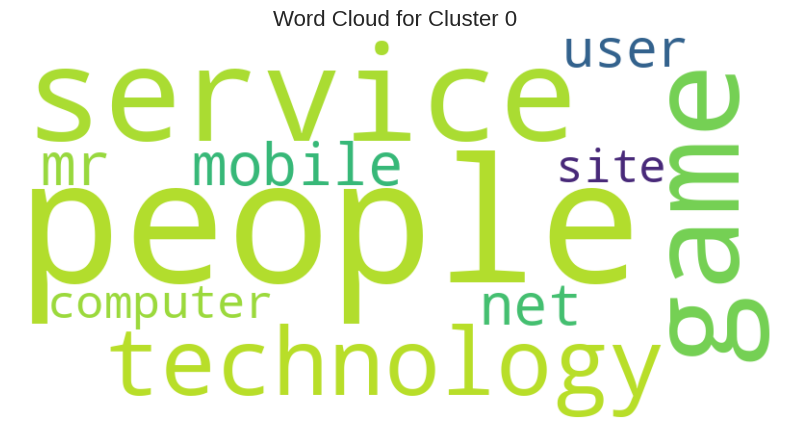

Generating Word Cloud for Cluster 1...


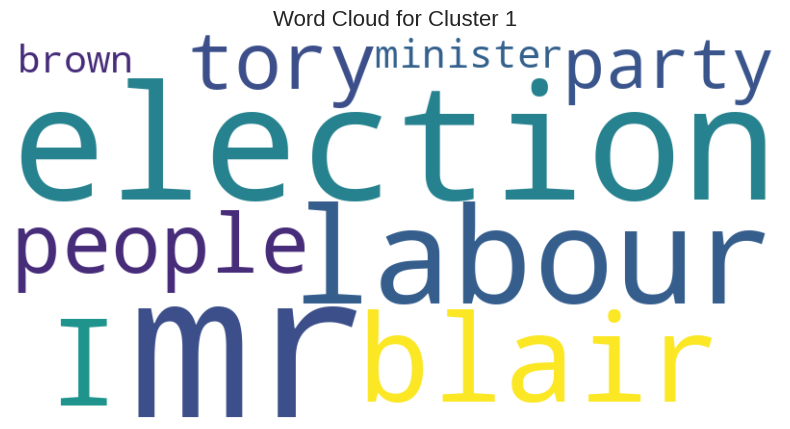

Generating Word Cloud for Cluster 2...


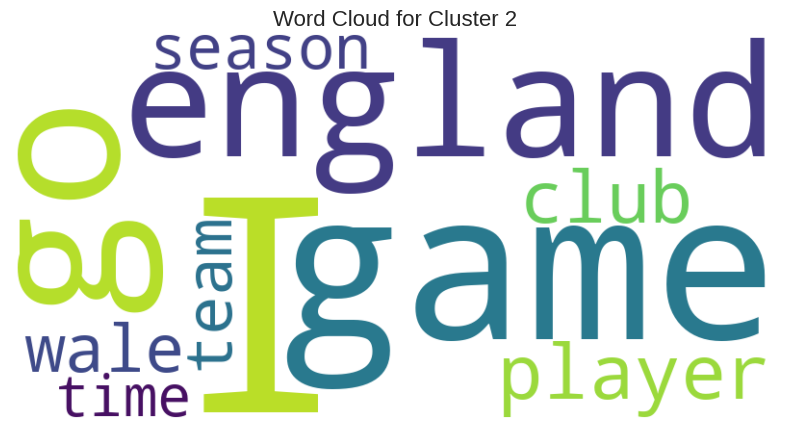

In [ ]:
#TODO - count keywords repetitions and plot wordclouds



from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Generate top 10 keywords for each document
top_keywords_list = []

for index, row in df.iterrows():
    # Process the document text
    text = row['processed_content'].split()
    cluster = row['Cluster']

    # Retrieve the LDA model for the document's cluster
    lda_model = best_lda_models[cluster]
    dictionary = lda_model.id2word

    # Convert document to Bag of Words
    bow = dictionary.doc2bow(text)

    # Get topic probabilities for the document
    topic_probs = lda_model.get_document_topics(bow, minimum_probability=0.0)

    # Sort topics by probability and select the most probable one
    sorted_topics = sorted(topic_probs, key=lambda x: x[1], reverse=True)
    top_topic_id = sorted_topics[0][0]

    # Extract the top 10 keywords for the top topic
    topic_terms = lda_model.get_topic_terms(top_topic_id, topn=10)
    top_keywords = [dictionary[word_id] for word_id, weight in topic_terms]

    # Append keywords to the list
    top_keywords_list.append(top_keywords)

df['top_keywords'] = top_keywords_list

# Step 2: Aggregate keywords by cluster
cluster_keywords = {}

for cluster in df['Cluster'].unique():
    # Collect all keywords from documents in the cluster
    keywords = []
    cluster_data = df[df['Cluster'] == cluster]['top_keywords']

    for keywords_list in cluster_data:
        keywords.extend(keywords_list)

    # Count keyword frequencies
    keyword_counts = Counter(keywords)

    # Limit to the top 10 most frequent keywords
    cluster_keywords[cluster] = dict(keyword_counts.most_common(10))

# Step 3: Generate Word Clouds for each cluster
for cluster, keywords_freq in cluster_keywords.items():
    print(f"Generating Word Cloud for Cluster {cluster}...")

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keywords_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster}", fontsize=16)
    plt.show()
